### Pima Indian Diabetes Data - Neural Network

Colaboratory - Keras with tensorflow backend

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
from sklearn.model_selection import train_test_split

In [4]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

Using TensorFlow backend.


In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Dataset
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Dataset/pima_indians_diabetes.csv')

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.describe()

# Observation
# 'Zero' values for multiple features inputs: Glucose, BloodPressure, SkinThickness, Insulin, BMI
# Binary Outcome

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
# Count number of 'zero' values
(df == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [11]:
# Feature engineering - replacing zero value with column mean
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean())
df['BMI'] = df['BMI'].replace(0, df['BMI'].mean())

(df == 0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [12]:
X = df.drop(columns=['Outcome'])
Y = df['Outcome']
print(X.head())
print(Y.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0      35.000000   79.799479  33.6   
1            1     85.0           66.0      29.000000   79.799479  26.6   
2            8    183.0           64.0      20.536458   79.799479  23.3   
3            1     89.0           66.0      23.000000   94.000000  28.1   
4            0    137.0           40.0      35.000000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


/usr/local/lib/python2.7/dist-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/usr/local/lib/python2.7/dist-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/usr/local/lib/python2.7/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


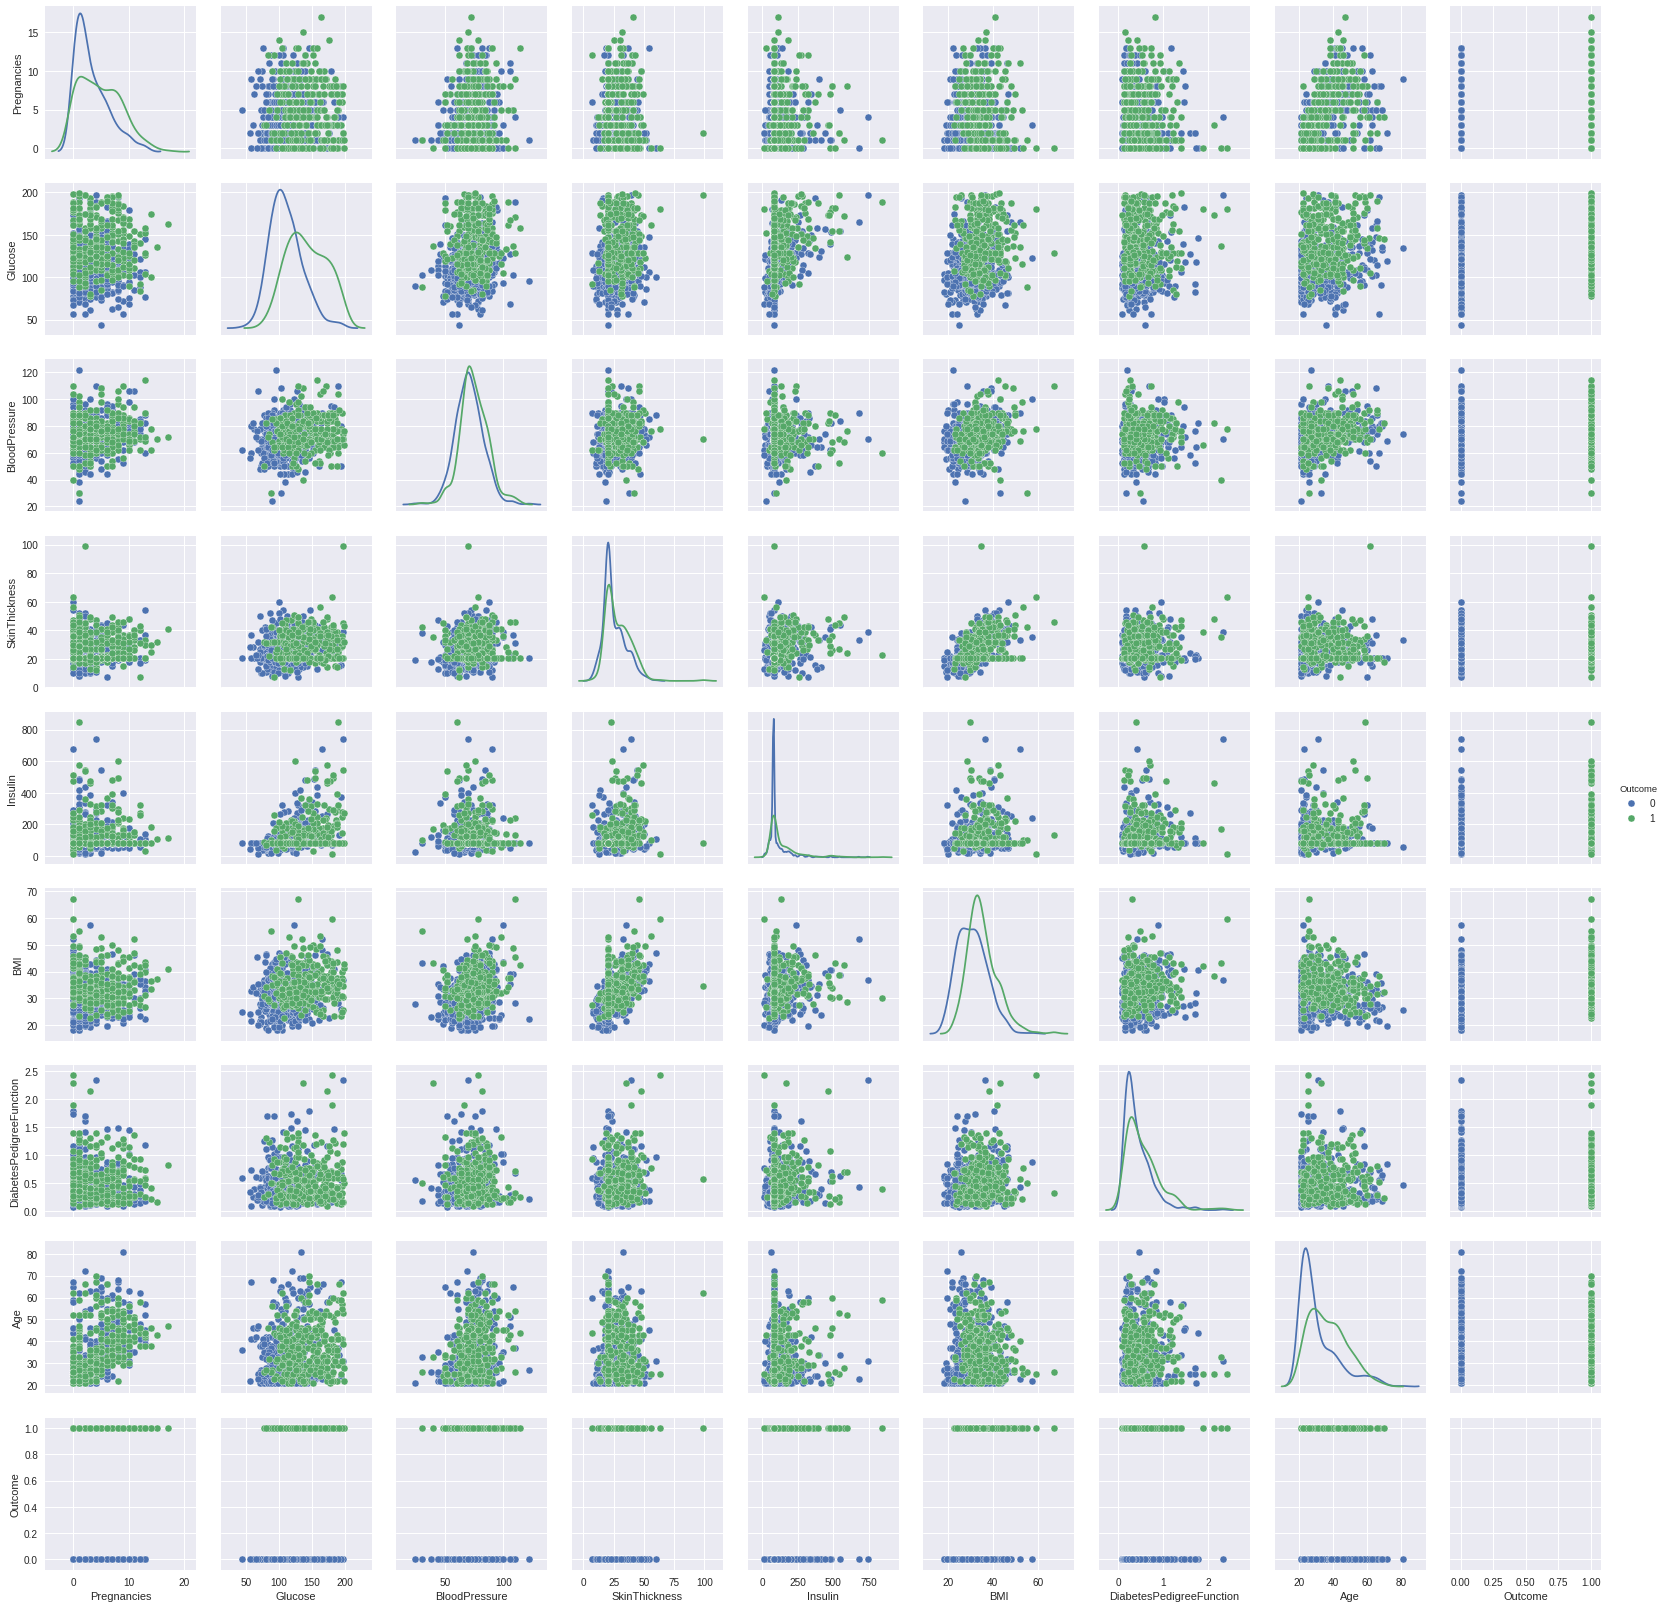

In [13]:
# Data visualization
sns.pairplot(df, hue='Outcome', diag_kind='kde')
plt.show()

In [33]:
# Normalize data
mean = X.mean(axis=0)
std = X.std(axis=0)
X_norm = (X - mean)/std

print(X_norm.head())

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639530  0.864712      -0.021031       0.871489 -0.417496  0.167147   
1    -0.844335 -1.205204      -0.516246       0.248516 -0.417496 -0.850980   
2     1.233077  2.014666      -0.681318      -0.630243 -0.417496 -1.330954   
3    -0.844335 -1.073781      -0.516246      -0.374456 -0.264934 -0.632810   
4    -1.141108  0.503298      -2.662181       0.871489  0.530078  1.548890   

   DiabetesPedigreeFunction       Age  
0                  0.468187  1.425067  
1                 -0.364823 -0.190548  
2                  0.604004 -0.105515  
3                 -0.920163 -1.040871  
4                  5.481337 -0.020483  


In [0]:
# Train test split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=2836)

In [82]:
# Sequential Model
model = Sequential()
model.add(Dense(8, activation='relu', input_dim=8))
model.add(Dropout(0.2))
model.add(Dense(12, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 8)                 72        
_________________________________________________________________
dropout_25 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_46 (Dense)             (None, 12)                108       
_________________________________________________________________
dropout_26 (Dropout)         (None, 12)                0         
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 13        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [0]:
# fit model
history = model.fit(x_train, y_train, validation_split=0.2, batch_size=50, epochs=500, verbose=0)

In [84]:
#print(history.history)
for key in history.history:
  print(key)

acc
loss
val_acc
val_loss


In [85]:
score = model.evaluate(x_test, y_test)
print(score)

154/154 [==============================] - 0s 86us/step
[0.5263987369351573, 0.7727272704050139]


<built-in method keys of dict object at 0x7f75e6982280>


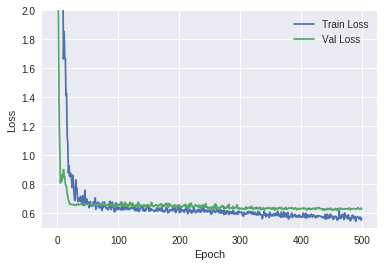

In [86]:
# Train test loss plot
print(history.history.keys)

def plot_history(history):
  plt.figure()
  plt.plot(history.epoch, np.array(history.history['loss']), label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_loss']), label='Val Loss')
  #plt.plot(history.epoch, np.array(history.history['acc']), label='Train Accuracy')
  #plt.plot(history.epoch, np.array(history.history['val_acc']), label='Val Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.ylim([0.5, 2])
  plt.show()
 
plot_history(history)